### Activate packages

In [25]:
using Plots

### Model and data wavebands

In [28]:
wv_drwn3=[400,425,450,475,500,525,550,575,600,625,650,675,700]
wv_cci=[412, 443, 490, 510, 555, 670]
println("done")

done


### Compute interpolation coefficients

In [29]:
   wv_cci=[412, 443, 490, 510, 555, 670];
   wv_drwn3=[400,425,450,475,500,525,550,575,600,625,650,675,700];
   jj=Array{Int64,1}(undef,6)
   ww=Array{Float64,1}(undef,6)
   for ii=1:6
      tmp=wv_cci[ii].-wv_drwn3
      kk=maximum(findall(tmp.>=0))
      jj[ii]=kk
      ww[ii]=tmp[kk]/(wv_drwn3[kk+1]-wv_drwn3[kk])
   end

### Irradiance test case 

In [30]:
siz=[1,1]
Rirr=Array{Float32,3}(undef,(siz[1],siz[2],13))
Rirr[1,1,:]= 1e-3*[23.7641,26.5037,27.9743,30.4914,28.1356,
    21.9385,18.6545,13.5100,5.6338,3.9272,2.9621,2.1865,1.8015]
println("done")

done


### Convert irradiance to reflectance

In [32]:
tmp=Rirr/3
Rrs0=(0.52*tmp)./(1.0 .-1.7*tmp)
println("done")

done


### Interpolate to observed wavelengths

In [33]:
Rrs=Array{Float32,3}(undef,(siz[1],siz[2],6))
for vv=1:6
    tmp0=Rrs0[:,:,jj[vv]]
    tmp1=Rrs0[:,:,jj[vv]+1]
    Rrs[:,:,vv]=tmp0.*(1-ww[vv])+tmp1.*ww[vv]
end

### Verify result

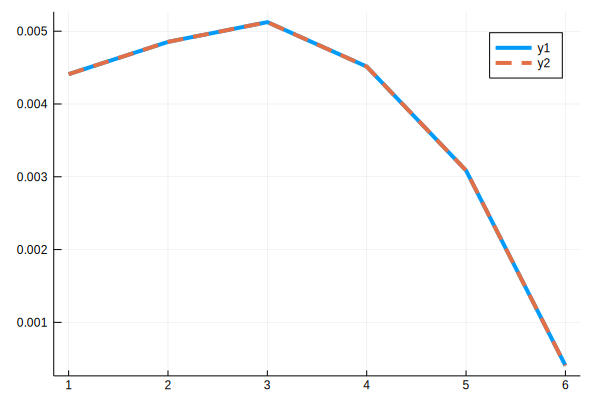

In [34]:
ref_Rrs0=1e-3*[4.1753, 4.6640, 4.9270, 5.3781, 4.9558, 3.8505
    , 3.2680, 2.3598, 0.9796, 0.6822, 0.5143, 0.3795, 0.3126]

ref_Rrs=1e-3*[4.4099, 4.8533, 5.1247, 4.5137, 3.0864, 0.4064]

plot(vec(Rrs),linewidth=4)
plot!(ref_Rrs,linewidth=4,ls=:dash)

### Compute "satellite Chl" in model

In [35]:
RRSB=max.(Rrs[:,:,2],Rrs[:,:,3])
RRSG=Rrs[:,:,5]
X = log10.(RRSB./RRSG) #ratio of blue to green
C=[0.3272, -2.9940, +2.7218, -1.2259, -0.5683] #OC4 algorithms (SeaWifs, CCI)
a0=C[1]; a1=C[2]; a2=C[3]; a3=C[4]; a4=C[5]
chld=exp10.(a0.+a1*X+a2*X.^2+a3*X.^3+a4*X.^4)

1×1 Array{Float64,2}:
 0.6101220292455024

### Classifier example (Moore 2009 "Fuzzy logic classifier")

In [37]:
#vectors
M=Array{Any,1}(undef,8)
M[1]=[0.0234 0.0192 0.0129 0.0075 0.0031 0.0002]
M[2]=[0.0162 0.0141 0.0112 0.0073 0.0034 0.0002]
M[3]=[0.0107 0.0098 0.0092 0.0070 0.0039 0.0003]
M[4]=[0.0065 0.0064 0.0070 0.0064 0.0048 0.0006]
M[5]=[0.0033 0.0034 0.0042 0.0042 0.0043 0.0009]
M[6]=[0.0064 0.0074 0.0105 0.0116 0.0140 0.0041]
M[7]=[0.0121 0.0140 0.0192 0.0204 0.0231 0.0084]
M[8]=[0.0184 0.0230 0.0333 0.0359 0.0409 0.0137]

#matrices
S=Array{Any,1}(undef,8)
S[1]=[0.00000959 0.00000556 0.00000138 -0.00000034 -0.00000024 -0.00000003; 
        0.00000556 0.00000493 0.00000193 0.00000060 0.00000023 0.00000001; 
        0.00000138 0.00000193 0.00000282 0.00000223 0.00000119 0.00000007; 
        -0.00000034 0.00000060 0.00000223 0.00000232 0.00000119 0.00000007; 
        -0.00000024 0.00000023 0.00000119 0.00000119 0.00000071 0.00000005; 
        -0.00000003 0.00000001 0.00000007 0.00000007 0.00000005 0.00000001]
S[2]=[0.00000346 0.00000186 -0.00000011 -0.00000060 -0.00000062 -0.00000005; 
        0.00000186 0.00000228 0.00000086 0.00000033 -0.00000007 0.00000003; 
        -0.00000011 0.00000086 0.00000231 0.00000221 0.00000145 0.00000023; 
        -0.00000060 0.00000033 0.00000221 0.00000266 0.00000191 0.00000034; 
        -0.00000062 -0.00000007 0.00000145 0.00000191 0.00000175 0.00000041; 
        -0.00000005 0.00000003 0.00000023 0.00000034 0.00000041 0.00000021]
S[3]=[0.00000241 0.00000144 0.00000035 -0.00000031 -0.00000063 -0.00000006; 
        0.00000144 0.00000138 0.00000076 0.00000015 -0.00000021 -0.00000001; 
        0.00000035 0.00000076 0.00000161 0.00000156 0.00000121 0.00000016; 
        -0.00000031 0.00000015 0.00000156 0.00000227 0.00000209 0.00000031; 
        -0.00000063 -0.00000021 0.00000121 0.00000209 0.00000225 0.00000037; 
        -0.00000006 -0.00000001 0.00000016 0.00000031 0.00000037 0.00000013]
S[4]=[0.00000166 0.00000091 0.00000034 -0.00000009 -0.00000080 -0.00000025; 
        0.00000091 0.00000097 0.00000071 0.00000025 -0.00000041 -0.00000015; 
        0.00000034 0.00000071 0.00000118 0.00000103 0.00000072 0.00000003; 
        -0.00000009 0.00000025 0.00000103 0.00000137 0.00000162 0.00000025; 
        -0.00000080 -0.00000041 0.00000072 0.00000162 0.00000290 0.00000065; 
        -0.00000025 -0.00000015 0.00000003 0.00000025 0.00000065 0.00000050]
S[5]=[0.00000178 0.00000132 0.00000104 0.00000081 0.00000018 -0.00000014; 
        0.00000132 0.00000127 0.00000121 0.00000099 0.00000034 -0.00000010; 
        0.00000104 0.00000121 0.00000150 0.00000142 0.00000110 0.00000013; 
        0.00000081 0.00000099 0.00000142 0.00000158 0.00000177 0.00000042; 
        0.00000018 0.00000034 0.00000110 0.00000177 0.00000351 0.00000131; 
        -0.00000014 -0.00000010 0.00000013 0.00000042 0.00000131 0.00000081]
S[6]=[0.00000715 0.00000586 0.00000409 0.00000292 0.00000005 -0.00000075; 
        0.00000586 0.00000589 0.00000520 0.00000398 0.00000027 -0.00000114; 
        0.00000409 0.00000520 0.00000634 0.00000541 0.00000188 -0.00000097; 
        0.00000292 0.00000398 0.00000541 0.00000528 0.00000392 0.00000070; 
        0.00000005 0.00000027 0.00000188 0.00000392 0.00000995 0.00000657; 
        -0.00000075 -0.00000114 -0.00000097 0.00000070 0.00000657 0.00000819]
S[7]=[0.00002625 0.00001981 0.00001058 0.00000544 -0.00000654 -0.00001122; 
        0.00001981 0.00001745 0.00001314 0.00000822 -0.00000431 -0.00001228; 
        0.00001058 0.00001314 0.00001629 0.00001226 0.00000035 -0.00001311; 
        0.00000544 0.00000822 0.00001226 0.00001170 0.00000742 -0.00000500; 
        -0.00000654 -0.00000431 0.00000035 0.00000742 0.00002241 0.00001782; 
        -0.00001122 -0.00001228 -0.00001311 -0.00000500 0.00001782 0.00003987]
S[8]=[0.00001186 0.00001134 0.00001139 0.00000919 0.00000395 -0.00000186; 
        0.00001134 0.00001484 0.00002034 0.00001907 0.00001531 0.00000087; 
        0.00001139 0.00002034 0.00003467 0.00003546 0.00003555 0.00000708; 
        0.00000919 0.00001907 0.00003546 0.00003907 0.00004604 0.00001733; 
        0.00000395 0.00001531 0.00003555 0.00004604 0.00007306 0.00004953; 
        -0.00000186 0.00000087 0.00000708 0.00001733 0.00004953 0.00006542];

#compute fuzzy logic classifier:
#fuzzyMmbr=NaN*zeros(length(S),1)
#for ii=1:length(S)
#    Xi=(Rrs_at_cci-M[ii})'
#    Zi=Xi'*inv(S[ii})*Xi
#    fuzzyMmbr(ii)=1-chi2cdf(Zi,6)
#end